In [194]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.spatial import ConvexHull
import random
import plotly.graph_objects as go

In [195]:
S = {(-1,-1,-1),(0,0,0),(3,0,0),(0,2,0),(0,0,2)}

In [196]:
#Fonctions utiles :

def max_dx_dy_dz(S) :
    dx = -1000000
    dy = -1000000
    dz = -1000000
    
    for (i,j,k) in S :
        if i > dx :
            dx = i
        if j > dy :
            dy = j
        if k > dz :
            dz = k
            
    return (dx,dy,dz)


def min_dx_dy_dz(S) :
    dx = 1000000
    dy = 1000000
    dz = 1000000
    
    for (i,j,k) in S :
        if i < dx :
            dx = i
        if j < dy :
            dy = j
        if k < dz :
            dz = k
            
    return (dx,dy,dz)

#min_max 2D retoucher pour la 3D :

def min_S_plus(S) :
    """ list[int] -> int
        Retourne le minimum de (i+j) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j,k) in S :
        val = (i+j)
        if val < mini :
            mini = val
    
    return mini

def min_S_moins(S) :
    """ list[int] -> int
        Retourne le minimum de (i-j) de l'ensemble S"""
    
    mini = 10000
    
    for (i,j,k) in S :
        val = (i-j)
        if val < mini :
            mini = val
    
    return mini


def max_S_moins(S) :
    """ list[int] -> int
        Retourne le maximum de (i-j) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j,k) in S :
        val = (i-j)
        if val > maxi :
            maxi = val
    
    return maxi

def max_S_plus(S) :
    """ list[int] -> int
        Retourne le maximum de (i+j) de l'ensemble S"""
    
    maxi = 0
    
    for (i,j,k) in S :
        val = (i+j)
        if val > maxi :
            maxi = val
    
    return maxi

#min_max S

def min_mm_S(S) :
    
    mini = 100000
    
    for (i,j,k) in S :
        tmp = i-j-k 
        if tmp < mini :
            mini = tmp
            
    return mini

def min_pp_S(S) :
    
    mini = 100000
    
    for (i,j,k) in S :
        tmp = i+j+k 
        if tmp < mini :
            mini = tmp
            
    return mini

def min_pm_S(S) :
    
    mini = 100000
    
    for (i,j,k) in S :
        tmp = i+j-k 
        if tmp < mini :
            mini = tmp
            
    return mini

def min_mp_S(S) :
    
    mini = 100000
    
    for (i,j,k) in S :
        tmp = i-j+k 
        if tmp < mini :
            mini = tmp
            
    return mini


def max_mm_S(S) :
    
    maxi = -100000
    
    for (i,j,k) in S :
        tmp = i-j-k 
        if tmp > maxi :
            maxi = tmp
            
    return maxi

def max_pp_S(S) :
    
    maxi = -100000
    
    for (i,j,k) in S :
        tmp = i+j+k 
        if tmp > maxi :
            maxi = tmp
            
    return maxi

def max_pm_S(S) :
    
    maxi = -100000
    
    for (i,j,k) in S :
        tmp = i+j-k 
        if tmp > maxi :
            maxi = tmp
            
    return maxi

def max_mp_S(S) :
    
    maxi = -100000
    
    for (i,j,k) in S :
        tmp = i-j+k 
        if tmp > maxi :
            maxi = tmp
            
    return maxi


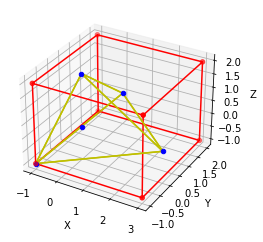

In [197]:
#Partie dessin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def draw_all_integral_points(S) :
    
    dx,dy,dz = max_dx_dy_dz(S)
    cpt = 0

    for i in range (-1,dx) :
        for j in range (-1,dy) :
            for k in range (-1,dz) :
                cpt += 1
                ax.scatter3D(i,j,k,color = "green")
    return cpt

def draw_points_S(S) :

    for (i,j,k) in S :
        ax.scatter3D(i,j,k,color = "blue")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
def draw_convex_hull(S) :
    
    pts = np.array(list(S))
    hull = ConvexHull(pts)
    
    sommets = set()
    for s in hull.simplices:
    
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        #print("S:",S)
        #print("s:",s)
        #print("x:",pts[s, 0])
        #print("y:",pts[s, 1])
        #print("z:",pts[s, 2])
        #print("\n")
        x = pts[s, 0]
        y = pts[s, 1]
        z = pts[s, 2]
        for i in range (0,len(x)-1) :
            sommets.add((x[i],y[i],z[i]))
        ax.plot(x,y,z, "y-")
    return sommets

    
def draw_bounding_box(S) :
    
    xmin,ymin,zmin = min_dx_dy_dz(S)
    xmax,ymax,zmax = max_dx_dy_dz(S)
    
    x = [xmin,xmin,xmin,xmin,xmax,xmax,xmax,xmax]
    y = [ymin,ymin,ymax,ymax,ymin,ymin,ymax,ymax]
    z = [zmin,zmax,zmin,zmax,zmin,zmax,zmin,zmax]
    
    
    
    ax.scatter3D(x,y,z,color = "red",label="A")
    
    X = [xmin,xmax,xmax,xmin,xmin]
    Y = [ymin,ymin,ymin,ymin,ymin]
    Z = [zmin,zmin,zmax,zmax,zmin]
    
    ax.plot(X,Y,Z, "r-")
    
    X = [xmin,xmax,xmax,xmin,xmin]
    Y = [ymax,ymax,ymax,ymax,ymax]
    Z = [zmin,zmin,zmax,zmax,zmin]
    
    ax.plot(X,Y,Z, "r-")
    ax.plot([xmax,xmax],[ymax,ymin],[zmax,zmax], "r-")
    ax.plot([xmax,xmax],[ymax,ymin],[zmin,zmin], "r-")
    ax.plot([xmin,xmin],[ymin,ymax],[zmax,zmax], "r-")
    ax.plot([xmin,xmin],[ymin,ymax],[zmin,zmin], "r-")
    
        
def draw_all(S):
    
    #dense_size = draw_all_integral_points(S)
    draw_points_S(S)
    draw_bounding_box(S)
    sommets = draw_convex_hull(S)

draw_all(S)
  


In [198]:
def draw_convex_hull_3D(S,fig) :
    
    pts = np.array(list(S))
    hull = ConvexHull(pts)
    

    for s in hull.simplices:
    
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        #print("S:",S)
        #print("s:",s)
        #print("x:",pts[s, 0])
        #print("y:",pts[s, 1])
        #print("z:",pts[s, 2])
        #print("\n")
        x = pts[s, 0]
        y = pts[s, 1]
        z = pts[s, 2]

        fig.add_scatter3d(x=x, y=y,z=z,marker=dict(color="blue",size=5),name="CONVEX HULL")
        

def draw_bounding_box_3D(S,fig) :
    
    xmin,ymin,zmin = min_dx_dy_dz(S)
    xmax,ymax,zmax = max_dx_dy_dz(S)
    
    X = [xmin,xmax,xmax,xmin,xmin]
    Y = [ymin,ymin,ymin,ymin,ymin]
    Z = [zmin,zmin,zmax,zmax,zmin]
    
    fig.add_scatter3d(x=X, y=Y,z=Z,marker=dict(color="red",size=5),name="CUBE ENGLOBANT")
    
    X = [xmin,xmax,xmax,xmin,xmin]
    Y = [ymax,ymax,ymax,ymax,ymax]
    Z = [zmin,zmin,zmax,zmax,zmin]
    
    fig.add_scatter3d(x=X, y=Y,z=Z,marker=dict(color="red",size=5),name="CUBE ENGLOBANT")
    
    fig.add_scatter3d(x=[xmax,xmax], y=[ymax,ymin],z=[zmax,zmax],marker=dict(color="red",size=5),
                      name="CUBE ENGLOBANT")
    fig.add_scatter3d(x=[xmax,xmax], y=[ymax,ymin],z=[zmin,zmin],marker=dict(color="red",size=5),
                      name="CUBE ENGLOBANT")
    fig.add_scatter3d(x=[xmin,xmin], y=[ymin,ymax],z=[zmax,zmax],marker=dict(color="red",size=5),
                      name="CUBE ENGLOBANT")
    fig.add_scatter3d(x=[xmin,xmin], y=[ymin,ymax],z=[zmin,zmin],marker=dict(color="red",size=5),
                      name="CUBE ENGLOBANT")

def draw_bounding_box_poinnts(S,fig) :
    
    color_table = ["red","purple","yellow","green","black","pink","lime","slateblue"]
    
    xmin,ymin,zmin = min_dx_dy_dz(S)
    xmax,ymax,zmax = max_dx_dy_dz(S)
    
    x = [xmin,xmin,xmin,xmin,xmax,xmax,xmax,xmax]
    y = [ymin,ymin,ymax,ymax,ymin,ymin,ymax,ymax]
    z = [zmin,zmax,zmin,zmax,zmin,zmax,zmin,zmax]
    
    for i in range(0,len(x)) :
        fig.add_scatter3d(x=np.array([x[i]]),y=np.array([y[i]]),z=np.array([z[i]]),mode='markers',
                          marker=dict(color=color_table[i],size=5),name=chr(65+i))
        

def draw_points_3D(S,fig) :

    x = []
    y = []
    z = []
    for (i,j,k) in S :
        x.append(i)
        y.append(j)
        z.append(k)
        
    number_of_colors = len(x)
    
    for i in range(0,len(x)) :
        
        

        c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                     for i in range(number_of_colors)]
    

        fig.add_scatter3d(x=np.array([x[i]]),y=np.array([y[i]]),z=np.array([z[i]]),mode='markers',
                          marker=dict(color = "cyan",size=5),name=chr(65+i))
        

    

def draw_all_integral_points(S,fig) :
    
    
    xmin,ymin,zmin = min_dx_dy_dz(S)
    xmax,ymax,zmax = max_dx_dy_dz(S)
    
    x = []
    y = []
    z = []

    for i in range (xmin,xmax+1) :
        for j in range (ymin,ymax+1) :
            for k in range (zmin,zmax+1) :
                x.append(i)
                y.append(j)
                z.append(k)
                
    fig.add_scatter3d(x=x, y=y,z=z,mode="markers",marker=dict(color="green"),name="A")
    
def draw_bounding_octagon_and_second_rectangle(S,fig,octogone=False,r = True) :
    
    # Calcule des coordonnées utiles
    dx,dy,zmax = max_dx_dy_dz(S)
    xmin,ymin,zmin = min_dx_dy_dz(S)  
    
    b = dx - max_S_moins(S)
    d = dx + dy - max_S_plus(S)
    f = dy + min_S_moins(S)
    h = min_S_plus(S)
    
    # Respectivement les coordonées (x,y,z) de [A,B,C,D,E,F,G,H] et [A',B',C',D',E',F',G',H']
    x = [h,dx-b,dx,dx,dx-d,f,0,0,h]
    y = [0,0,b,dy-d,dy,dy,dy-f,h,0]
    z = [zmin,zmin,zmin,zmin,zmin,zmin,zmin,zmin,zmin]
    z2 = [zmax,zmax,zmax,zmax,zmax,zmax,zmax,zmax,zmax]
    
    if octogone :
    
        #Bounding Octagon :

        #Ligne octogone bas
        fig.add_scatter3d(x=np.array(x), y=np.array(y),z=np.array(z),marker=dict(color="green",size=3),name="octogone")
        #Lignes octogone haut
        fig.add_scatter3d(x=np.array(x), y=np.array(y),z=np.array(z2),marker=dict(color="green",size=3),name="octogone")
        #Tracage des lignes en hauteur
        for i in range(0,len(z)) :
            fig.add_scatter3d(x=[x[i],x[i]], y=[y[i],y[i]],z=[zmin,zmax],marker=dict(color="green",size=3),name="octogone")
    
    if r :
        #Bounding second rectangle :

        #Calcule du milieu de [AB],[CD],[EF],[GH] :
        x_milieu = []
        y_milieu = []

        cpt = 0 
        indice = 0
        while cpt < 4 :
            if cpt % 2 == 0 :
                mid = abs((x[indice+1] - x[indice])/2 )

                if cpt == 2 :
                    x_milieu.append( x[indice] - mid )
                    y_milieu.append( y[indice] + mid)

                else :
                    x_milieu.append( x[indice] + mid )
                    y_milieu.append( y[indice] - mid)

            else :
                mid = abs((y[indice+1] - y[indice])/2 )

                if cpt == 1 :

                    x_milieu.append( x[indice] + mid )
                    y_milieu.append( y[indice] + mid)

                else :

                    x_milieu.append( x[indice] - mid )
                    y_milieu.append( y[indice] - mid)


            indice += 2
            cpt += 1
        x_milieu.append(x_milieu[0])
        y_milieu.append(y_milieu[0])

        #Tracage du cube :

        #Ligne octogone bas
        fig.add_scatter3d(x=x_milieu, y=y_milieu,z=z,marker=dict(color="purple",size=3),name="R'")
        #Lignes octogone haut
        fig.add_scatter3d(x=x_milieu, y=y_milieu,z=z2,marker=dict(color="purple",size=3),name="R'")
        for i in range(0,4) :
            fig.add_scatter3d(x=[x_milieu[i],x_milieu[i]], y=[y_milieu[i],y_milieu[i]],z=[zmin,zmax],marker=dict(color="purple",size=3),name="R'")

        

def main() :
    
    fig = go.Figure()

    
    #draw_all_integral_points(S,fig)
    
    draw_convex_hull_3D(S,fig) 
    draw_bounding_box_3D(S,fig)
    #draw_bounding_box_poinnts(S,fig)
    draw_points_3D(S,fig) 


    fig.show()

    
#main()

In [199]:
S1={(2,0,0),(1,1,1),(5,2,2),(7,2,0),(2,3,4),(2,2,2),(0,4,0),(7,4,3),(8,4,0),(5,5,0)}

In [200]:
def main2() :
    
    fig = go.Figure()

    
    #draw_all_integral_points(S,fig)
    draw_bounding_octagon_and_second_rectangle(S1,fig) 
    draw_points_3D(S1,fig)
    draw_convex_hull_3D(S1,fig) 
    draw_bounding_box_3D(S1,fig)
    #draw_bounding_box_points(S1,fig)
    
    fig.show()

    
main2()